In [13]:
import numpy as np
from numpy.fft import *
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
M=loadmat('Lab_data/M.mat')['M']

(a) Simulate an MR data acquisition using the function itok.m to transfer the image data M to the k-space domain yielding the k-space data K. Depict the image and k-space data K.

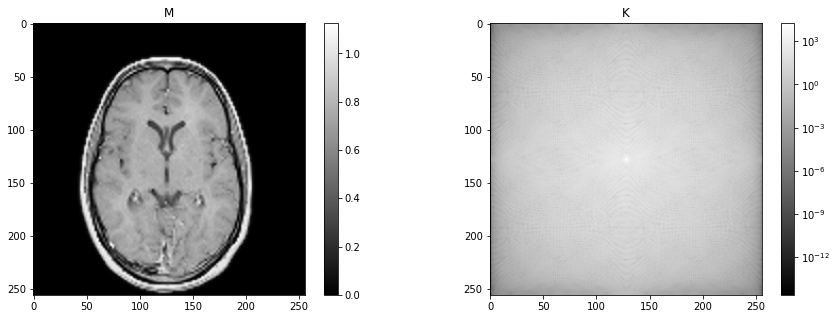

In [14]:
K=fftshift(fft2(ifftshift(M)))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(M),cmap='gray')
plt.title("M")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.abs(K),norm=LogNorm(),cmap='gray')
plt.title("K")
plt.colorbar()
plt.show()


(b) Simulate a Cartesian sampling pattern with a uniform undersampling factor of 2 in one direction by creating a zero matrix U2 with the same size as K and then set every second horizontal line to 1. Following a similar procedure simulate Cartesian sampling patterns with a uniform undersampling factor of 5 (U5) and with a random undersampling factor of 3 (UR3) in one direction. Depict the undersampling patterns and compare them.

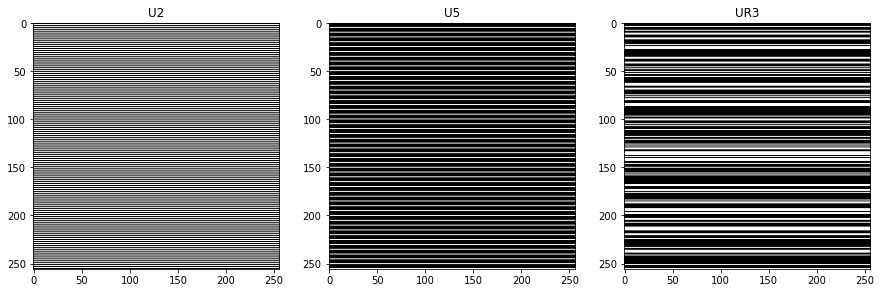

In [15]:
U2=np.zeros_like(K,dtype=bool)
U5=np.zeros_like(K,dtype=bool)
UR3=np.zeros_like(K,dtype=bool)

U2[np.arange(0,256,2,dtype=int),:]=1
U5[np.arange(0,256,5,dtype=int),:]=1
UR3[np.random.choice(256,256//3,replace=False),:]=1

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(U2,cmap='gray')
plt.title("U2")
plt.subplot(1,3,2)
plt.imshow(U5,cmap='gray')
plt.title("U5")
plt.subplot(1,3,3)
plt.imshow(UR3,cmap='gray')
plt.title("UR3")
plt.show()

(c) Apply the undersampling patterns by multiplying K with the corresponding undersampling pattern U and transform the obtained k-space data to image space using ktoi.m yielding MU. Depict and compare the undersampled images. How would you expect the undersampled images to look like if the undersampling would have been performed in the other direction?

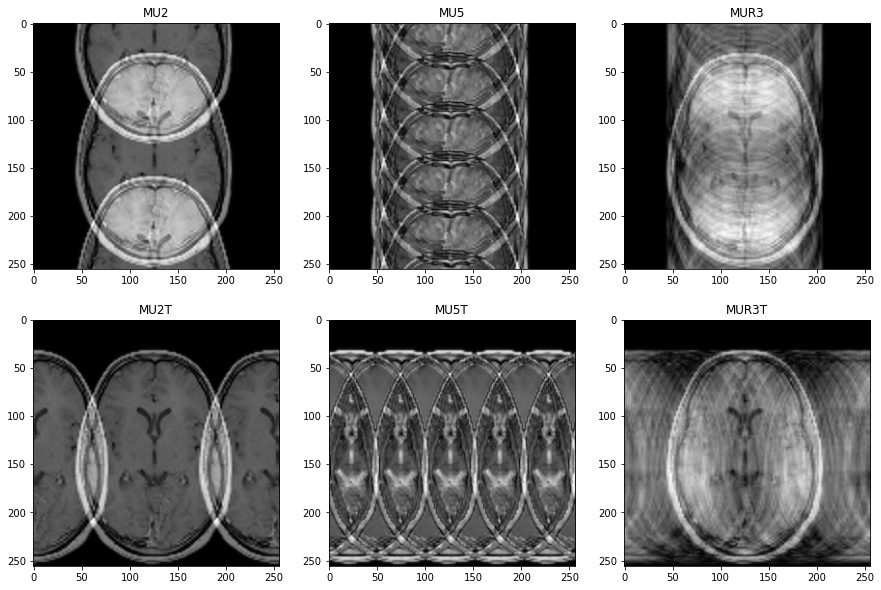

In [16]:
MU2=fftshift(ifft2(ifftshift(K*U2)))
MU5=fftshift(ifft2(ifftshift(K*U5)))
MUR3=fftshift(ifft2(ifftshift(K*UR3)))

MU2T=fftshift(ifft2(ifftshift(K*U2.T)))
MU5T=fftshift(ifft2(ifftshift(K*U5.T)))
MUR3T=fftshift(ifft2(ifftshift(K*UR3.T)))

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(np.abs(MU2),cmap='gray')
plt.title("MU2")
plt.subplot(2,3,2)
plt.imshow(np.abs(MU5),cmap='gray')
plt.title("MU5")
plt.subplot(2,3,3)
plt.imshow(np.abs(MUR3),cmap='gray')
plt.title("MUR3")

plt.subplot(2,3,4)
plt.imshow(np.abs(MU2T),cmap='gray')
plt.title("MU2T")
plt.subplot(2,3,5)
plt.imshow(np.abs(MU5T),cmap='gray')
plt.title("MU5T")
plt.subplot(2,3,6)
plt.imshow(np.abs(MUR3T),cmap='gray')
plt.title("MUR3T")

plt.show()

(d) A commonly used approach to study the effect of different sampling patterns on the final image quality is to analyze the point spread function PSF corresponding to each sampling pattern. The PSF describes the response of an imaging system to a single delta function. A delta function in image space is equivalent to a constant k-space signal. Therefore, the PSF for each undersampling pattern can be obtained by multiplying the corresponding sampling pattern U with a constant 2D k-space (i.e. KPSF = ones(N,N);) and then transforming it to image space. Depict the PSF for each of the Cartesian undersampling patterns (U2, U5 and UR3) and compare them. What happened to the delta peak input for these sampling patterns?

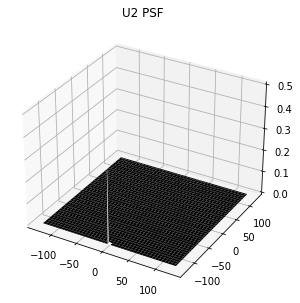

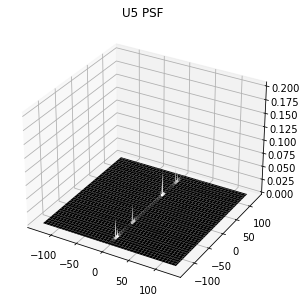

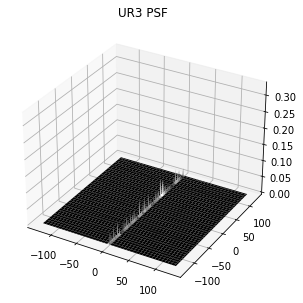

In [17]:
U2_PSF=fftshift(ifft2(ifftshift(U2)))
U5_PSF=fftshift(ifft2(ifftshift(U5)))
UR3_PSF=fftshift(ifft2(ifftshift(UR3)))

# plt.figure(figsize=(20,5))
# plt.subplot(1,3,1)
X=np.arange(-128,128)
Y=np.arange(-128,128)
X,Y=np.meshgrid(X,Y)
fig,ax=plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,5))
ax.plot_surface(X,Y,np.abs(U2_PSF),cmap='gray')
plt.title("U2 PSF")
plt.show()
fig,ax=plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,5))
ax.plot_surface(X,Y,np.abs(U5_PSF),cmap='gray')
plt.title("U5 PSF")
plt.show()
fig,ax=plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,5))
ax.plot_surface(X,Y,np.abs(UR3_PSF),cmap='gray')
plt.title("UR3 PSF")
plt.show()